# MNIST 손글씨 데이터 분류기

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
# tensorflow, matplotlib의 pyplot, random을 불러온다
import tensorflow as tf
import matplotlib.pyplot as plt
import random  #train set으로 검증할 때 샘플을 랜덤하게 뽑아내기위해 필요
from tensorflow.examples.tutorials.mnist import input_data #MNIST 데이터 불러올때 필요한 패키지 데이터 전처리 해줌.

In [6]:
tf.set_random_seed(777)  # for reproducibility

In [9]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 
# one_hot을 True로 해주면 데이터를 one_hot으로 바꾸는 별도의 작업이 필요없음.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
nb_classes = 10  #숫자가 0부터 9까지 이기 때문에 10개. 추후에 클래스 지정에 쓰임.

In [12]:
# MNIST 데이터가 28x28 = 784이기 때문에 입력값은 열은 784로 고정.
X = tf.placeholder(tf.float32, [None, 784])
# 분류해야할 숫자가 0부터 9까지이기때문에 클래스 수를 10개로 고정.
Y = tf.placeholder(tf.float32, [None, nb_classes])

# 단층 레이어로 만듦. X에 곱해지는 weight는 784행 10열 텐서로 설정.
W = tf.Variable(tf.random_normal([784, nb_classes]))
# bias는 1행 10열 텐서로 만들어놓으면 파이썬의 broadcasting에 의해서 일괄적용.
b = tf.Variable(tf.random_normal([nb_classes]))
# dropout (keep_prob) rate :
# 보통 훈련시 0.7로 한다. 엣지 중 30%를 버리는것. 예측할때는 1로 설정해야한다.
keep_prob = tf.placeholder(tf.float32)

In [13]:
# multi class로 분류하는 것이기 때문에 sigmoid함수가 아닌 softmax함수를 이용한다.
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
# drop out :
# 깊게 레이어가 쌓여지면 오버피팅이 발생함. 그래서 dropout은 오버피팅을 막기위하여 랜덤하게 부분부분만 사용해서 훈련시키는거.
hypothesis = tf.nn.dropout(hypothesis, keep_prob=keep_prob) 

# cost entroy를 이용하여 cost 함수 정의.
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
# GD를 활용한 최적화. learning_rate = 0.1
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 

In [14]:
# 추후 test set을 이용해서 테스트.
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
'머신을 통해 나온 예측값인 tf.argmax(hypothesis, 1)와 정답값인 tf.argmax(Y, 1)를 비교하여 같은지 비교.'
# 정확도 계산
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [15]:
# parameters
num_epochs = 15 # 전 데이터 set을 한번 다 학습시킨 것.
batch_size = 100   #한 번에 몇개씩 학습시킬 것인가. 너무 많은 데이터를 가지고 학습하면 메모리가 부족함. 그래서 100개씩 만 가져와서 학습.
num_iterations = int(mnist.train.num_examples / batch_size)

In [19]:
# training set으로 머신러닝 훈련시키기

sess = tf.Session()

# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer()) 

# Training cycle : 훈련시키는 프로세스
for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 1}) #단층이라 1로 설정. 보통 drop out = 0.7
        avg_cost += cost_val / num_iterations

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

#훈련이 끝나면 "Learning finished" 출력
print("Learning finished")

Epoch: 0001, Cost: 2.741000463
Epoch: 0002, Cost: 1.088638805
Epoch: 0003, Cost: 0.869194318
Epoch: 0004, Cost: 0.761807203
Epoch: 0005, Cost: 0.693591120
Epoch: 0006, Cost: 0.644675890
Epoch: 0007, Cost: 0.607970518
Epoch: 0008, Cost: 0.578426129
Epoch: 0009, Cost: 0.553892451
Epoch: 0010, Cost: 0.533402676
Epoch: 0011, Cost: 0.515918421
Epoch: 0012, Cost: 0.500657689
Epoch: 0013, Cost: 0.487237539
Epoch: 0014, Cost: 0.474644798
Epoch: 0015, Cost: 0.464387354
Learning finished


In [21]:
# test sets으로 훈련된 머신의 정확도 확인
print(
    "Accuracy: ",
    accuracy.eval(  #accuracy.eval(...) = sess.run(...)
        session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}   #학습이 잘 되었는지 보기위해 test set으로 돌린다.
    ),
)

Accuracy:  0.8912


Label:  [5]
Prediction:  [5]


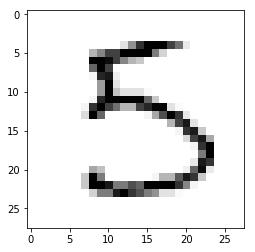

In [23]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)  #랜덤으로 숫자하나 읽어와서 테스트
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
print(
   "Prediction: ",
    sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1], keep_prob: 1}),
)

plt.imshow(
    mnist.test.images[r : r + 1].reshape(28, 28),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()